In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
df=pd.read_csv('vehicles.csv')

In [4]:
df.shape

(435849, 25)

In [5]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,https://mohave.craigslist.org,3495,2012.0,jeep,patriot,like new,4 cylinders,...,NaN,NaN,NaN,silver,https://images.craigslist.org/00B0B_k2AXIJ21ok...,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",NaN,az,34.4554,-114.2690
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,https://oregoncoast.craigslist.org,13750,2014.0,bmw,328i m-sport,good,NaN,...,rwd,NaN,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8...,Selling my 2014 BMW 328i with the following be...,NaN,or,46.1837,-123.8240
2,7115048251,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,https://greenville.craigslist.org,2300,2001.0,dodge,caravan,excellent,6 cylinders,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_t4WqYn5nDC...,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",NaN,sc,34.9352,-81.9654
3,7119250502,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,9000,2004.0,chevrolet,colorado ls,excellent,5 cylinders,...,rwd,mid-size,pickup,red,https://images.craigslist.org/00J0J_lJEzfeVLHI...,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",NaN,az,34.4783,-114.2710
4,7120433904,https://maine.craigslist.org/ctd/d/searsport-t...,maine,https://maine.craigslist.org,0,2021.0,NaN,Honda-Nissan-Kia-Ford-Hyundai-VW,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/01010_j0IW34mCsm...,CALL: 207.548.6500 TEXT: 207.407.5598 **WE FI...,NaN,me,44.4699,-68.8963


In [7]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [8]:
df.nunique(axis=0) #returns the number of unique values for each variable

id              435849
url             435849
region             403
region_url         413
price            16742
year               109
manufacturer        42
model            33700
condition            6
cylinders            8
fuel                 5
odometer        108839
title_status         6
transmission         3
vin             141546
drive                3
size                 4
type                13
paint_color         12
image_url       298802
description     366891
county               0
state               51
lat              49377
long             48583
dtype: int64

In [9]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))) #summarizes the count, mean, standard deviation, min, and max for numeric variables. The code that follows this simply formats each row to the regular format and suppresses scientific notation

,id,price,year,odometer,county,lat,long
count,435849.000000,435849.000000,434732.000000,360701.000000,0.000000,427614.000000,427614.000000
mean,7115953556.014652,134912.714215,2009.866460,98975.904261,nan,38.404163,-94.961170
std,4590853.931224,16908570.031872,9.312503,113499.019048,nan,6.036915,18.058561
min,7096577274.000000,0.000000,1900.000000,0.000000,nan,-83.197100,-177.012000
25%,7112450082.000000,4900.000000,2007.000000,47333.000000,nan,34.225700,-111.731000
50%,7117092338.000000,9995.000000,2012.000000,91188.000000,nan,38.934800,-89.676700
75%,7120090344.000000,17989.000000,2015.000000,134736.000000,nan,42.484500,-81.397300
max,7121608239.000000,3647256576.000000,2021.000000,10000000.000000,nan,79.601900,173.675000


In [10]:
df.condition.unique()

array(['like new', 'good', 'excellent', nan, 'fair', 'new', 'salvage'],
      dtype=object)

In [13]:
# Reclassify condition column

def clean_condition(row):
    
    good = ['good','fair']
    excellent = ['excellent','like new']       
    
    if row.condition in good:
        return 'good'   
    if row.condition in excellent:
        return 'excellent'    
    return row.condition # Clean dataframe
def clean_df(playlist):
    df_cleaned = df.copy()
    df_cleaned['condition'] = df_cleaned.apply(lambda row: clean_condition(row), axis=1)
    return df_cleaned # Get df with reclassfied 'condition' column
df_cleaned = clean_df(df)
print(df_cleaned.condition.unique())

['excellent' 'good' nan 'new' 'salvage']


In [15]:
df_cleaned = df_cleaned.copy().drop(['url','image_url','region_url'], axis=1)

In [19]:
#Getting rid of columns that had 40% or more null values

NA_val = df_cleaned.isna().sum()
def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df_cleaned.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
df_cleaned=df_cleaned[na_filter(NA_val)]
df_cleaned.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'description', 'state', 'lat', 'long'],
      dtype='object')

In [21]:
#Removing outliers
df_cleaned = df_cleaned[df_cleaned['price'].between(999.99, 99999.00)]
df_cleaned = df_cleaned[df_cleaned['year'] > 1990]
df_cleaned = df_cleaned[df_cleaned['odometer'] < 899999.00]
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,year,odometer,lat,long
count,322427.000000,322427.000000,322427.000000,322427.000000,319310.000000,319310.000000
mean,7115951786.481166,14745.500191,2011.380229,99033.799452,38.705444,-95.119294
std,4597430.056189,10897.919625,5.344417,64294.898639,5.973018,18.156258
min,7105616677.000000,1000.000000,1991.000000,0.000000,-83.197100,-177.012000
25%,7112413637.500000,6850.000000,2008.000000,50000.000000,34.763500,-111.939000
50%,7117098375.000000,11999.000000,2012.000000,93974.000000,39.225700,-89.605900
75%,7120101472.500000,19788.000000,2016.000000,137000.000000,42.641700,-81.477300
max,7121608239.000000,99999.000000,2021.000000,898000.000000,67.002200,139.388000


In [22]:
# Remove rows with null values
df_cleaned = df_cleaned.dropna(axis=0)
df_cleaned.shape

(144702, 18)

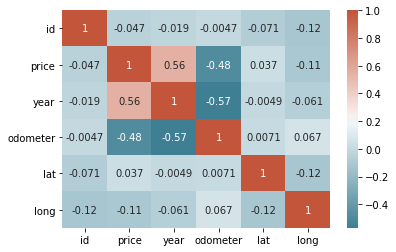

In [23]:
# calculate correlation matrix
corr = df_cleaned.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

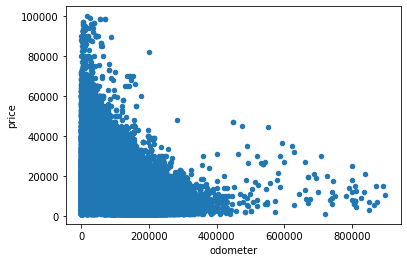

In [24]:
df_cleaned.plot(kind='scatter', x='odometer', y='price')

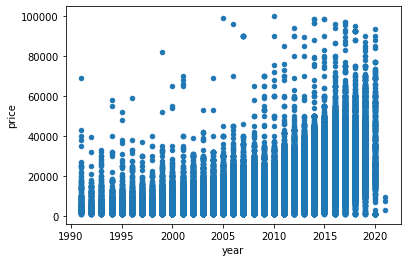

In [25]:
df_cleaned.plot(kind='scatter', x='year', y='price')

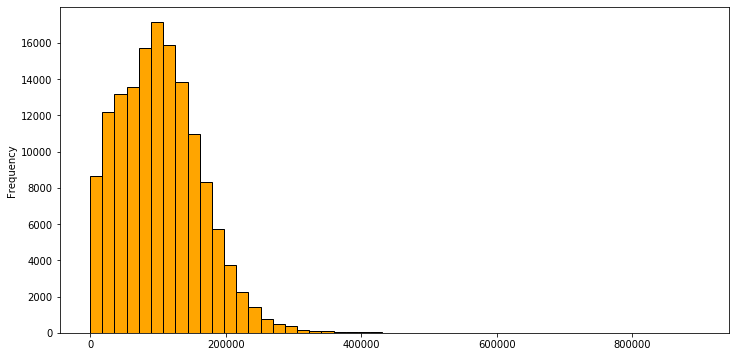

In [32]:
df_cleaned['odometer'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='orange',edgecolor='black')

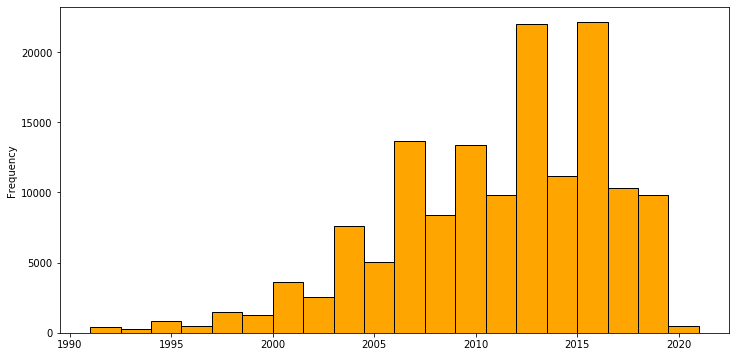

In [31]:
df_cleaned['year'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='orange',edgecolor='black')

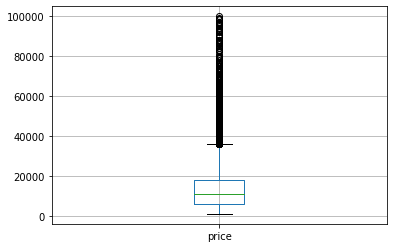

In [33]:
df_cleaned.boxplot('price')